In [23]:
#Importing Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [24]:
groceries = pd.read_csv('previouslypur.csv')
groceries.head(50)

,order_id,string_agg
0,98060,Alu Puff
1,98058,Pootharekalu
2,97984,"Maggi 2 Minute Masala Noodles, Mtr Puliogare P..."
3,97980,"Maggi 2 Minute Masala Noodles, Cadbury Bournvi..."
4,97947,"Green Peas, Brinjal - Rampuri, Mushrooms - But..."
5,97933,"Carrot Ooty, Eggs, Banana - Raw Green"
6,97932,"Tata Salt, Aavin - Green"
7,97928,"Beans - Ring, Green Peas, Cucumber - English, ..."
8,97927,Drools Let's Bite Active Kitten 1.44 Kg
9,97921,"Sapota/Chikku, Methi/Venthaya Keerai, Alphonso..."


In [25]:
#groceries = groceries.string_agg.str.replace('\d+', '')

In [26]:
groceries.shape

(488, 2)

In [27]:
#checking data has null value
groceries.isnull().sum()

order_id      0
string_agg    0
dtype: int64

In [28]:
# get all the transcactions as a list
transcactions = list(groceries['string_agg'].apply(lambda x: sorted(x.split(','))))
transcactions

[['Alu Puff'],
 ['Pootharekalu'],
 [' Loose Sugar',
  ' Mtr Puliogare Paste',
  ' Tulsi Dried Anjeer',
  'Maggi 2 Minute Masala Noodles'],
 [' Cadbury Bournville Cranberry Dark Chocolate Bar',
  ' Real Cranberry Juice',
  'Maggi 2 Minute Masala Noodles'],
 [' Brinjal - Rampuri',
  ' Cucumber',
  ' Groundnut - Fresh',
  ' Mushrooms - Button',
  'Green Peas'],
 [' Banana - Raw Green', ' Eggs', 'Carrot Ooty'],
 [' Aavin - Green', 'Tata Salt'],
 [' Banana - Robusta',
  ' Brinjal - Long',
  ' Brinjal - Rampuri',
  ' Cabbage - Local',
  ' Carrot Ooty',
  ' Chilli - Green',
  ' Chow Chow',
  ' Cucumber - English',
  ' Ginger',
  ' Green Peas',
  ' Lemon',
  ' Mint Leaves',
  ' Mosambi',
  ' Papaya',
  ' Ridge Gourd',
  'Beans - Ring'],
 ["Drools Let's Bite Active Kitten 1.44 Kg"],
 [' Alphonso Mango - Ratnagiri',
  ' Methi/Venthaya Keerai',
  ' Spinach/Palak',
  'Sapota/Chikku'],
 [' Jam Bun', 'Dilpasand'],
 [' Banana - Robusta',
  ' Brinjal - Rampuri',
  ' Broccoli',
  ' Capsicum Green',
  '

In [29]:
# instantiate transcation encoder
encoder = TransactionEncoder().fit(transcactions)
onehot = encoder.transform(transcactions)

In [35]:
# convert one-hot encode data to DataFrame
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
onehot.head()

,1 To 3 Noodles Masala,20 20 Gold,20-20 Cashew Cookie5,20-20 Gold,20-20 Gold Chocolate,24 Mantra Organic Brown Chana,24 Mantra Organic Jaggery Powder,24 Mantra Organic Kabuli Chana,24 Mantra Organic Mango Jam,24 Mantra Organic Moong Dal,...,Veg Kiddy Burger,Veg Puff,Water 20l Sjm,Watermelon,Watermelon - Kiran,Wheat bread,White Prawns Big,Whole Chicken (skinless),Yellow Water Melon,Zucchini - Green
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# compute frequent items using the Apriori algorithm

In [37]:
from apyori import apriori

In [38]:
# compute frequent items using the Apriori algorithm - Get up to three items
frequent_itemsets = apriori(onehot, 
                            min_support = 0.01,  # From our datalist how much % of item should have purchased 
                            max_len = 3,
                            min_confidence=1)   #Take columns 


#transactions, min_support=0.5,  min_confidence=1

# Defining association_rule

In [ ]:
# compute all association rules for frequent_itemsets                         
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1) 

In [ ]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head(25)

# Rule-1 (Sort Values Based on confidence)

In [326]:
#Sort Values Based on confidence
rules.sort_values("confidence",ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
206,"( Tomato - Local, Green Peas)",( Capsicum Green),0.010246,0.038934,0.010246,1.000000,25.684211,0.009847,inf,2,"Tomato - Local, Green Peas",Capsicum Green
236,"( Knol Khol, Tomato - Local)",( Carrot Ooty),0.010246,0.028689,0.010246,1.000000,34.857143,0.009952,inf,2,"Knol Khol, Tomato - Local",Carrot Ooty
253,"( Ridge Gourd, Tomato - Local)",( Ladies Finger / Bendi),0.010246,0.020492,0.010246,1.000000,48.800000,0.010036,inf,2,"Ridge Gourd, Tomato - Local",Ladies Finger / Bendi
175,"( Cucumber, Green Peas)",( Capsicum Green),0.010246,0.038934,0.010246,1.000000,25.684211,0.009847,inf,2,"Cucumber, Green Peas",Capsicum Green
132,( Pineapple),( Papaya),0.010246,0.036885,0.010246,1.000000,27.111111,0.009868,inf,1,Pineapple,Papaya
252,"( Ridge Gourd, Ladies Finger / Bendi)",( Tomato - Local),0.010246,0.028689,0.010246,1.000000,34.857143,0.009952,inf,2,"Ridge Gourd, Ladies Finger / Bendi",Tomato - Local
242,"( Onion, Knol Khol)",( Cucumber),0.010246,0.032787,0.010246,1.000000,30.500000,0.009910,inf,2,"Onion, Knol Khol",Cucumber
28,( Beans Ring),( Banana Yelakki),0.010246,0.016393,0.010246,1.000000,61.000000,0.010078,inf,1,Beans Ring,Banana Yelakki
157,"( Knol Khol, Green Peas)",( Banana - Yelakki),0.010246,0.026639,0.010246,1.000000,37.538462,0.009973,inf,2,"Knol Khol, Green Peas",Banana - Yelakki
158,"( Banana - Yelakki, Green Peas)",( Knol Khol),0.010246,0.020492,0.010246,1.000000,48.800000,0.010036,inf,2,"Banana - Yelakki, Green Peas",Knol Khol


# Rule-2 (Sort Values Based on lift)

In [359]:
#Sort Values Based on lift
rules.sort_values("lift",ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
28,( Beans Ring),( Banana Yelakki),0.010246,0.016393,0.010246,1.000000,61.000000,0.010078,inf,1,Beans Ring,Banana Yelakki
29,( Banana Yelakki),( Beans Ring),0.016393,0.010246,0.010246,0.625000,61.000000,0.010078,2.639344,1,Banana Yelakki,Beans Ring
256,( Ladies Finger / Bendi),"( Ridge Gourd, Tomato - Local)",0.020492,0.010246,0.010246,0.500000,48.800000,0.010036,1.979508,1,Ladies Finger / Bendi,"Ridge Gourd, Tomato - Local"
159,( Knol Khol),"( Banana - Yelakki, Green Peas)",0.020492,0.010246,0.010246,0.500000,48.800000,0.010036,1.979508,1,Knol Khol,"Banana - Yelakki, Green Peas"
158,"( Banana - Yelakki, Green Peas)",( Knol Khol),0.010246,0.020492,0.010246,1.000000,48.800000,0.010036,inf,2,"Banana - Yelakki, Green Peas",Knol Khol
253,"( Ridge Gourd, Tomato - Local)",( Ladies Finger / Bendi),0.010246,0.020492,0.010246,1.000000,48.800000,0.010036,inf,2,"Ridge Gourd, Tomato - Local",Ladies Finger / Bendi
200,"( Capsicum Green, Green Peas)",( Ladies Finger / Bendi),0.012295,0.020492,0.010246,0.833333,40.666667,0.009994,5.877049,2,"Capsicum Green, Green Peas",Ladies Finger / Bendi
235,"( Carrot Ooty, Tomato - Local)",( Knol Khol),0.012295,0.020492,0.010246,0.833333,40.666667,0.009994,5.877049,2,"Carrot Ooty, Tomato - Local",Knol Khol
169,"( Carrot Ooty, Capsicum Green)",( Knol Khol),0.012295,0.020492,0.010246,0.833333,40.666667,0.009994,5.877049,2,"Carrot Ooty, Capsicum Green",Knol Khol
238,( Knol Khol),"( Carrot Ooty, Tomato - Local)",0.020492,0.012295,0.010246,0.500000,40.666667,0.009994,1.975410,1,Knol Khol,"Carrot Ooty, Tomato - Local"


# To show the results in Visualization format with respect to lift

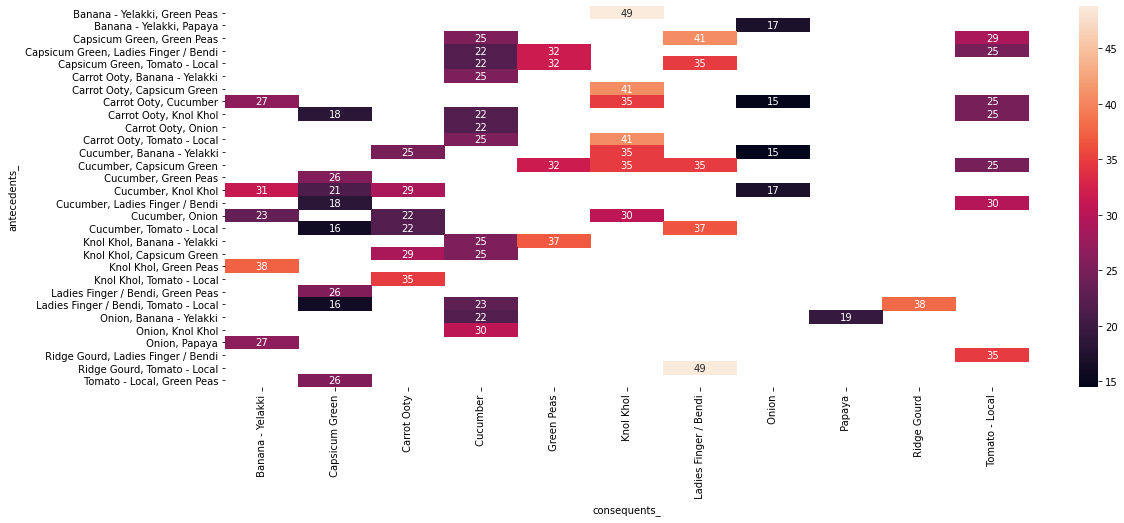

In [328]:
##   antecedents_ -->   consists of two items which customers have bought and
##   consequents -->    is the item we recommend


# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()
